<a href="https://colab.research.google.com/github/Gopizone/DS/blob/main/K_means_(Wholesale_customers)_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files=files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [2]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [3]:
wsc = pd.read_csv("Wholesale customers data.csv")
wsc.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
df_norm = norm_func(wsc.iloc[:,2:])
df_norm.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [7]:
k = list(range(2,8))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
TWSS

[array([66.66559691]),
 array([59.71443394]),
 array([52.56791929]),
 array([50.18346285]),
 array([47.07866975]),
 array([43.76271665])]

([<matplotlib.axis.XTick at 0x7ff59e99cba8>,
 <a list of 6 Text major ticklabel objects>)

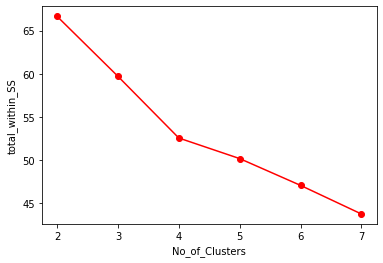

In [8]:
#Elbow Chart
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [9]:
kmeans_clust=KMeans(n_clusters=4)
kmeans_clust.fit(df_norm)
Clusters=pd.DataFrame(kmeans_clust.labels_,columns=['Clusters'])
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,2
...,...
435,2
436,2
437,1
438,0


In [10]:
wsc['h_clusterid'] = pd.DataFrame(Clusters)

In [12]:
wsc

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,h_clusterid
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,2
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,2
436,1,3,39228,1431,764,4510,93,2346,2
437,2,3,14531,15488,30243,437,14841,1867,1
438,1,3,10290,1981,2232,1038,168,2125,0


In [15]:
#Grouping Data for predictions further 

result=wsc.iloc[:,2:].groupby(wsc.h_clusterid).mean()

In [16]:
result

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,h_clusterid
h_clusterid,,,,,,,
0,9255.978947,3095.919298,3864.950877,2659.491228,999.645614,1037.077193,0
1,5813.978495,10753.709677,17016.204301,1461.215054,7356.451613,1867.763441,1
2,37342.846154,6170.000000,6330.288462,8216.461538,962.615385,3312.423077,2
3,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000,3
